In [1]:
#Load Prereq Libraries
import os
import sys
import time
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
from pathlib import Path

In [2]:
production = pd.read_csv('Resources/world food production.csv')
production.head()

,Entity,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
0,Afghanistan,1961,700000.0,319000.0,7467702.0,2279000.0,1873812.0,56315.0,3270871.0,12000.0,...,10100.0,232910.0,1131882.0,225000.0,870970.0,835368.0,5600.0,3139079.0,63439.0,15100.0
1,Afghanistan,1962,700000.0,319000.0,7420515.0,2279000.0,2044797.0,61519.0,3562524.0,12800.0,...,10100.0,259412.0,1111006.0,225000.0,883512.0,867170.0,6000.0,3181580.0,65118.0,15100.0
2,Afghanistan,1963,713000.0,319000.0,8479074.0,1947000.0,2096077.0,63596.0,3409916.0,12800.0,...,10100.0,251529.0,1145004.0,225000.0,996674.0,922621.0,6160.0,3304256.0,61760.0,15100.0
3,Afghanistan,1964,720000.0,380000.0,9113779.0,2230000.0,2388264.0,66604.0,3229336.0,12800.0,...,12400.0,247556.0,1160831.0,265000.0,1162048.0,1190061.0,6400.0,3392527.0,62759.0,18400.0
4,Afghanistan,1965,720000.0,380000.0,10067913.0,2282000.0,2559608.0,72418.0,3169104.0,13200.0,...,13700.0,266947.0,1138860.0,287000.0,1075084.0,874245.0,6800.0,3450849.0,66269.0,20400.0


In [3]:
#Renaming Country Column for reasons
production = production.rename(columns={'Entity': 'Country'})

In [4]:
column_drop = ['Maize Production (tonnes)',
       'Yams  Production (tonnes)', 'Tomatoes Production (tonnes)',
       'Sweet potatoes  Production (tonnes)', 'Sunflower seed  Production (tonnes)', 'Sugar cane Production (tonnes)',
       'Soybeans  Production (tonnes)', 'Rye  Production (tonnes)',
       'Potatoes  Production (tonnes)', 'Oranges  Production (tonnes)',
       'Peas, dry Production ( tonnes)', 'Palm oil  Production (tonnes)','Grapes  Production (tonnes)',
       'Cocoa beans Production (tonnes)', 'Meat, chicken  Production (tonnes)',
       'Bananas  Production ( tonnes)', 'Avocados Production (tonnes)',
       'Apples Production (tonnes)']

columns_to_drop_existing1 = [col for col in column_drop if col in production.columns]
production.drop(columns=columns_to_drop_existing1, axis=1, inplace=True)
production.head()

,Country,Year,Rice Production ( tonnes),Wheat Production (tonnes),Tea Production ( tonnes ),"Coffee, green Production ( tonnes)"
0,Afghanistan,1961,319000.0,2279000.0,56315.0,870970.0
1,Afghanistan,1962,319000.0,2279000.0,61519.0,883512.0
2,Afghanistan,1963,319000.0,1947000.0,63596.0,996674.0
3,Afghanistan,1964,380000.0,2230000.0,66604.0,1162048.0
4,Afghanistan,1965,380000.0,2282000.0,72418.0,1075084.0


In [5]:
production['Wheat Production (tonnes)'] = production['Wheat Production (tonnes)'] / 1000000000
production['Tea  Production ( tonnes )'] = production['Tea  Production ( tonnes )'] / 1000000000
production['Coffee, green Production ( tonnes)'] = production['Coffee, green Production ( tonnes)'] / 1000000000
production['Rice  Production ( tonnes)'] = production['Rice  Production ( tonnes)'] / 1000000000

In [6]:

production.rename(columns={'Wheat Production (tonnes)': 'Wheat Production (billion tonnes)',
                           'Tea  Production ( tonnes )': 'Tea Production (billion tonnes)',
                           'Coffee, green Production ( tonnes)': 'Coffee, green Production (billion tonnes)',
                           'Rice  Production ( tonnes)': 'Rice  Production (billion tonnes)'}, inplace=True)

production.head()

,Country,Year,Rice Production (billion tonnes),Wheat Production (billion tonnes),Tea Production (billion tonnes),"Coffee, green Production (billion tonnes)"
0,Afghanistan,1961,0.000319,0.002279,0.000056,0.000871
1,Afghanistan,1962,0.000319,0.002279,0.000062,0.000884
2,Afghanistan,1963,0.000319,0.001947,0.000064,0.000997
3,Afghanistan,1964,0.000380,0.002230,0.000067,0.001162
4,Afghanistan,1965,0.000380,0.002282,0.000072,0.001075


In [7]:
# Get Dataframe for all productions in each year
yearly_production = production.groupby('Year')[['Wheat Production (billion tonnes)', 'Tea Production (billion tonnes)', 'Coffee, green Production (billion tonnes)', 'Rice  Production (billion tonnes)']].sum().reset_index()
yearly_production.head()

,Year,Wheat Production (billion tonnes),Tea Production (billion tonnes),"Coffee, green Production (billion tonnes)",Rice Production (billion tonnes)
0,1961,4.104986,0.024994,0.049368,4.550507
1,1962,4.308814,0.023332,0.052743,3.683388
2,1963,4.181401,0.023134,0.049501,3.816552
3,1964,4.216309,0.022313,0.049230,3.630016
4,1965,4.281537,0.022827,0.049256,3.847935


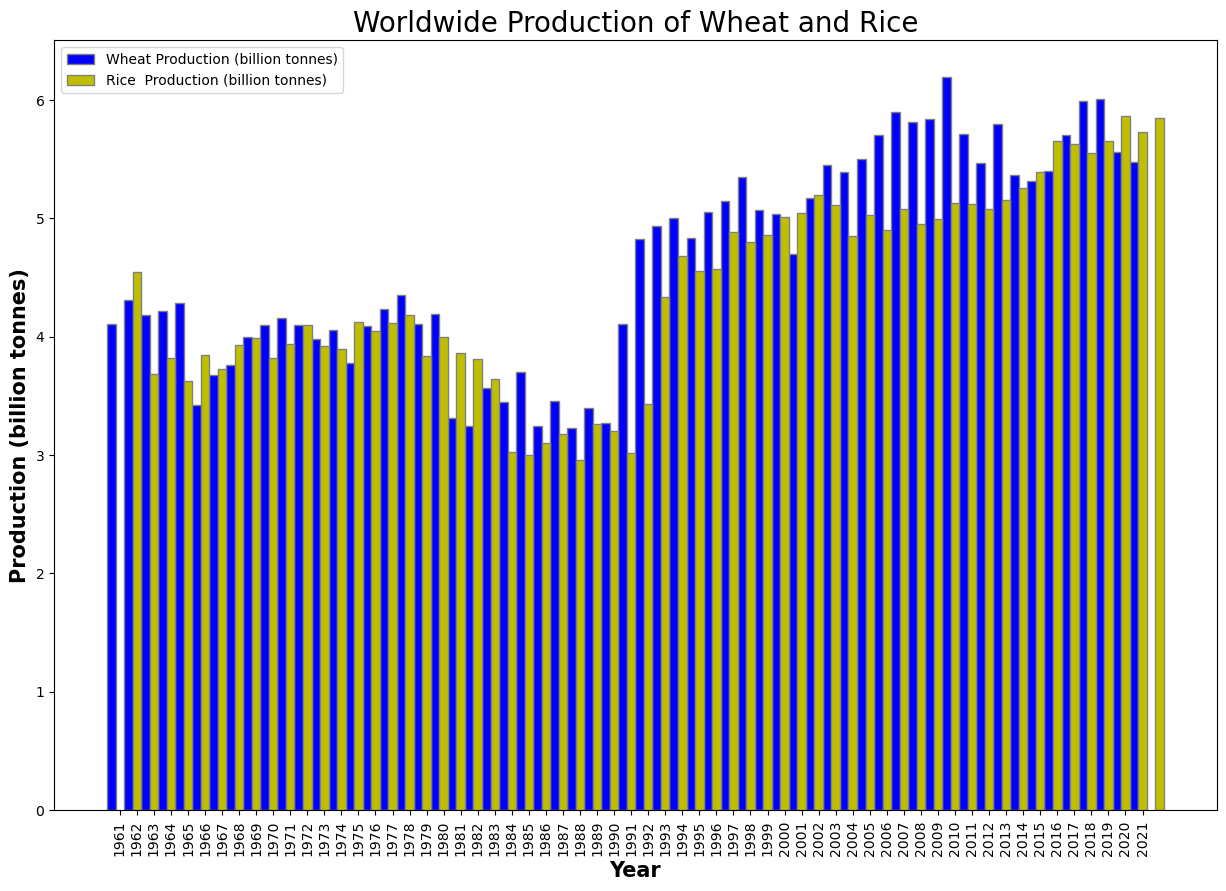

In [21]:
#Layered Bar graph of yearly Productions worldwide
plt.figure(figsize=(15, 10))
barWidth = 0.5
r1 = np.arange(len(yearly_production['Year']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r1, yearly_production['Wheat Production (billion tonnes)'], color='b', width=barWidth, edgecolor='grey', label='Wheat Production (billion tonnes)')
plt.bar(r4, yearly_production['Rice  Production (billion tonnes)'], color='y', width=barWidth, edgecolor='grey', label='Rice  Production (billion tonnes)')
plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(yearly_production['Year']))], yearly_production['Year'], rotation=90)
plt.ylabel('Production (billion tonnes)', fontweight='bold', fontsize=15)
plt.title('Worldwide Production of Wheat and Rice', fontsize=20)
plt.legend()
plt.show()


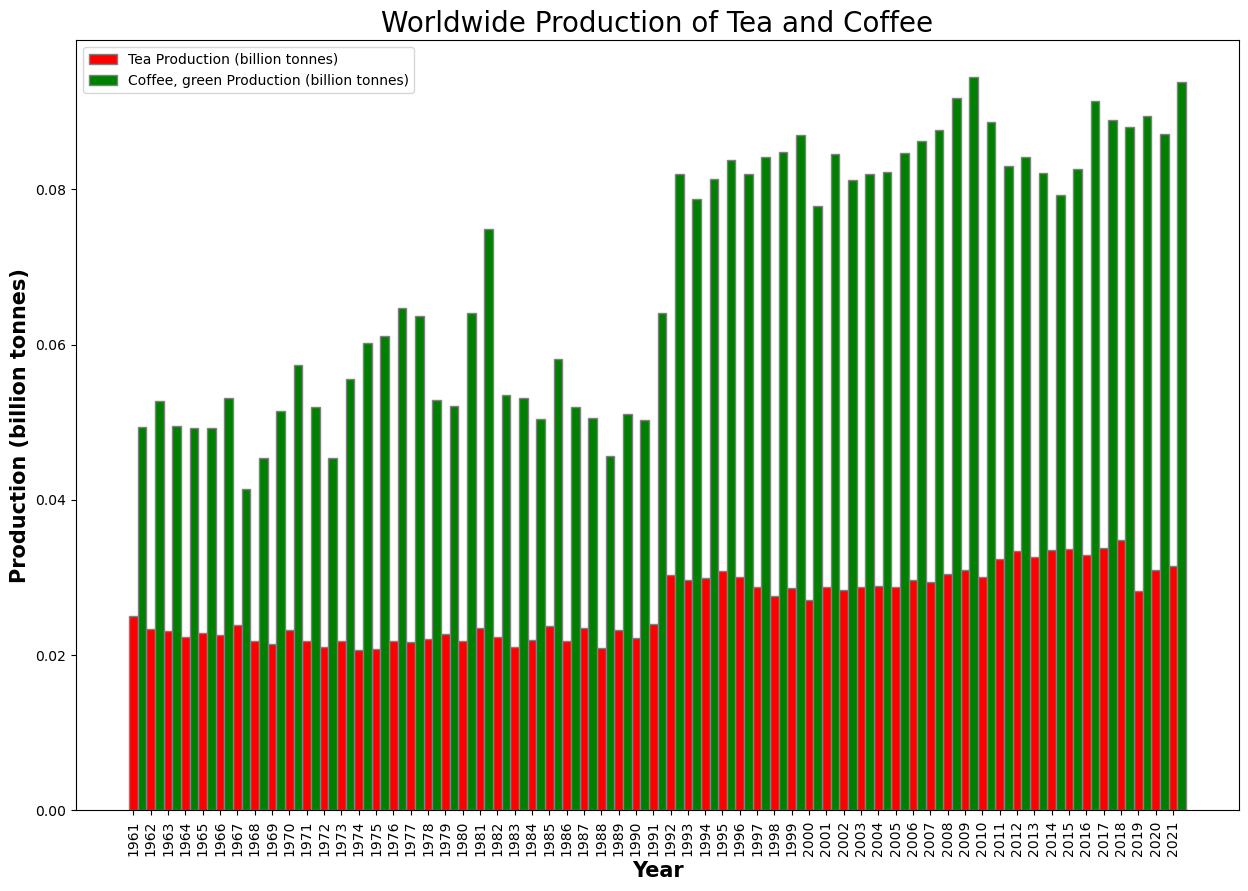

In [22]:
plt.figure(figsize=(15, 10))
barWidth = 0.5
r1 = np.arange(len(yearly_production['Year']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r2, yearly_production['Tea Production (billion tonnes)'], color='r', width=barWidth, edgecolor='grey', label='Tea Production (billion tonnes)')
plt.bar(r3, yearly_production['Coffee, green Production (billion tonnes)'], color='g', width=barWidth, edgecolor='grey', label='Coffee, green Production (billion tonnes)')
plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(yearly_production['Year']))], yearly_production['Year'], rotation=90)
plt.ylabel('Production (billion tonnes)', fontweight='bold', fontsize=15)
plt.title('Worldwide Production of Tea and Coffee', fontsize=20)
plt.legend()
plt.show()

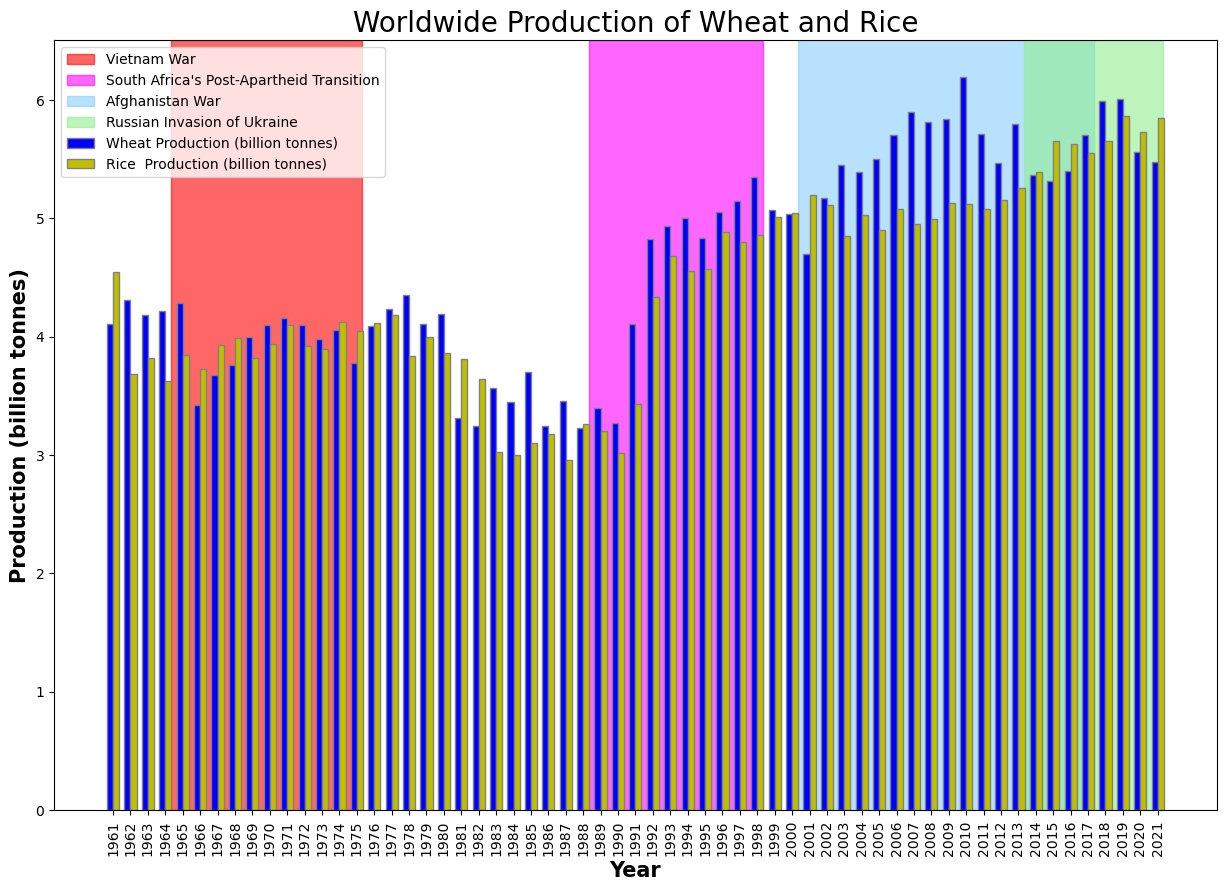

In [44]:
#Create a colormap for the wheat and rice production with the years of: Vietnam War (1965-1975), South Africa's Post-Apartheid Transition (1989-1998) Afghanistan war (2001-2017) and Russian invasion of Ukraine (2014 - 2022)
plt.figure(figsize=(15, 10))
barWidth = 0.35
r1 = np.arange(len(yearly_production['Year']))
r4 = [x + barWidth * 1 for x in r1]

# Add background colors for specific time periods
time_periods = [
    {'start': 1965, 'end': 1975, 'color': 'red', 'label': 'Vietnam War'},
    {'start': 1989, 'end': 1998, 'color': 'magenta', 'label': "South Africa's Post-Apartheid Transition"},
    {'start': 2001, 'end': 2017, 'color': 'lightskyblue', 'label': 'Afghanistan War'},
    {'start': 2014, 'end': 2021, 'color': 'lightgreen', 'label': 'Russian Invasion of Ukraine'}
]

for period in time_periods:
    start_index = np.where(yearly_production['Year'] == period['start'])[0][0]
    end_index = np.where(yearly_production['Year'] == period['end'])[0][0] if period['end'] in yearly_production['Year'].values else -1
    plt.axvspan(start_index - 0.5, end_index + 0.5, color=period['color'], alpha=0.6, label=period['label'])

plt.bar(r1, yearly_production['Wheat Production (billion tonnes)'], color='b', width=barWidth, edgecolor='grey', label='Wheat Production (billion tonnes)')
plt.bar(r4, yearly_production['Rice  Production (billion tonnes)'], color='y', width=barWidth, edgecolor='grey', label='Rice  Production (billion tonnes)')

plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth/2 for r in range(len(yearly_production['Year']))], yearly_production['Year'], rotation=90)
plt.ylabel('Production (billion tonnes)', fontweight='bold', fontsize=15)
plt.title('Worldwide Production of Wheat and Rice', fontsize=20)
plt.legend()
plt.show()



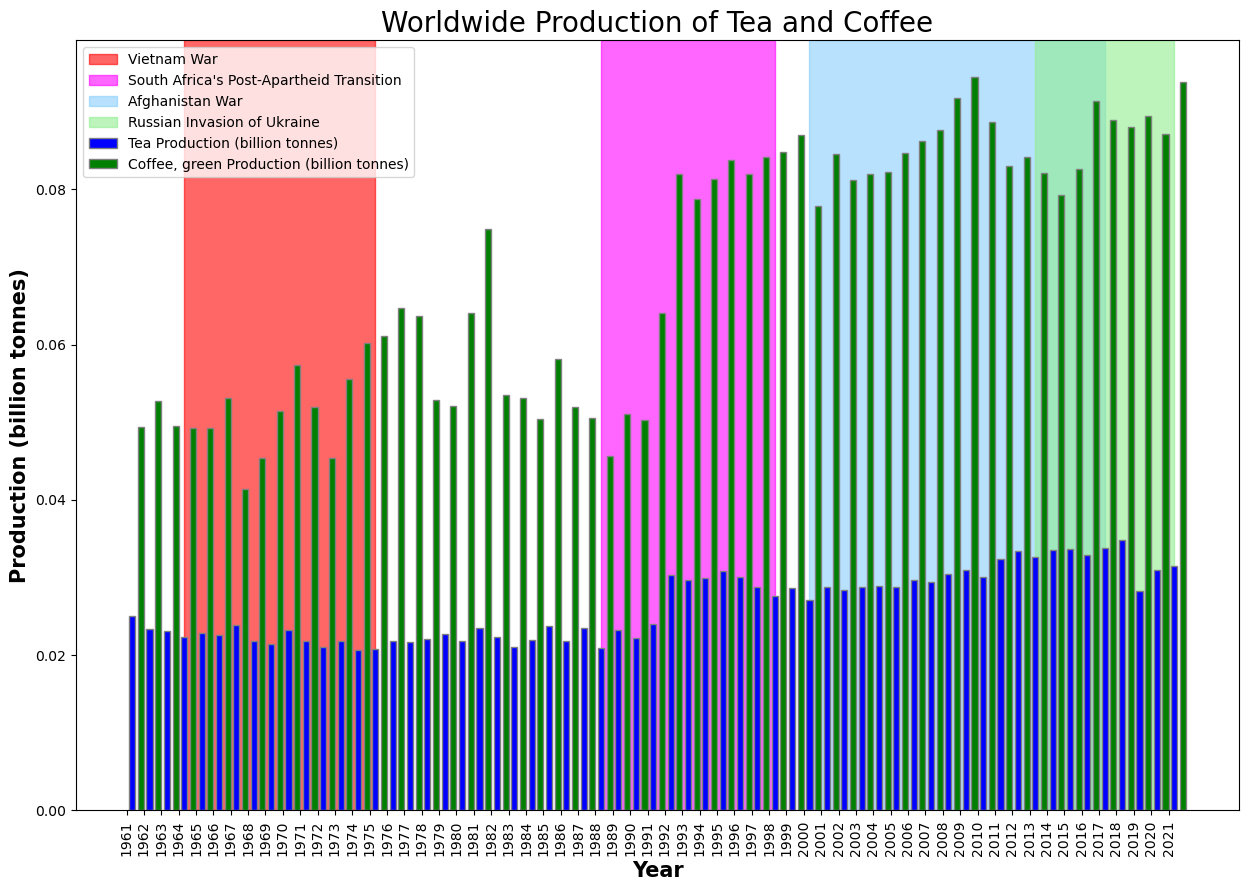

In [46]:
#Create a colormap for the Tea and Coffee production with the years of: Vietnam War (1965-1975), South Africa's Post-Apartheid Transition (1989-1998) Afghanistan war (2001-2017) and Russian invasion of Ukraine (2014 - 2022)
plt.figure(figsize=(15, 10))
barWidth = 0.35
r1 = np.arange(len(yearly_production['Year']))
r4 = [x + barWidth * 1 for x in r1]

# Add background colors for specific time periods
time_periods = [
    {'start': 1965, 'end': 1975, 'color': 'red', 'label': 'Vietnam War'},
    {'start': 1989, 'end': 1998, 'color': 'magenta', 'label': "South Africa's Post-Apartheid Transition"},
    {'start': 2001, 'end': 2017, 'color': 'lightskyblue', 'label': 'Afghanistan War'},
    {'start': 2014, 'end': 2021, 'color': 'lightgreen', 'label': 'Russian Invasion of Ukraine'}
]

for period in time_periods:
    start_index = np.where(yearly_production['Year'] == period['start'])[0][0]
    end_index = np.where(yearly_production['Year'] == period['end'])[0][0] if period['end'] in yearly_production['Year'].values else -1
    plt.axvspan(start_index - 0.5, end_index + 0.5, color=period['color'], alpha=0.6, label=period['label'])

plt.bar(r2, yearly_production['Tea Production (billion tonnes)'], color='b', width=barWidth, edgecolor='grey', label='Tea Production (billion tonnes)')
plt.bar(r3, yearly_production['Coffee, green Production (billion tonnes)'], color='g', width=barWidth, edgecolor='grey', label='Coffee, green Production (billion tonnes)')
plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth/2 for r in range(len(yearly_production['Year']))], yearly_production['Year'], rotation=90)
plt.ylabel('Production (billion tonnes)', fontweight='bold', fontsize=15)
plt.title('Worldwide Production of Tea and Coffee', fontsize=20)
plt.legend()
plt.show()